In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv('/content/links.csv')
df2 = pd.read_csv('/content/movies.csv')
df3 = pd.read_csv('/content/ratings.csv')
df4 = pd.read_csv('/content/tags.csv')


data = df1.merge(df2,on='movieId').merge(df3,on='movieId').merge(df4,on='movieId')
data.head()

,movieId,imdbId,tmdbId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,336,pixar,1139045764
1,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,474,pixar,1137206825
2,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,567,fun,1525286013
3,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,336,pixar,1139045764
4,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,474,pixar,1137206825


In [5]:
data.value_counts('tag')

,count
tag,
sci-fi,2527
thought-provoking,2487
twist ending,2434
atmospheric,2227
dark comedy,2056
...,...
mirrors,1
missing children,1
Van Gogh,1


In [42]:
top = data['tag'].value_counts().nlargest(20).index.tolist()
df = data[data['tag'].isin(top)]
df.value_counts('tag')

,count
tag,
sci-fi,2527
thought-provoking,2487
twist ending,2434
atmospheric,2227
dark comedy,2056
superhero,1787
psychology,1750
Disney,1748
time travel,1730


In [55]:
av = df.groupby('tag')['rating'].mean()
avrage = av.sort_values(ascending=False)

<ipython-input-57-251f883b2829>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=avrage.index, x=avrage.values, palette="hls")


Text(0.5, 1.0, 'Average rating of production house')

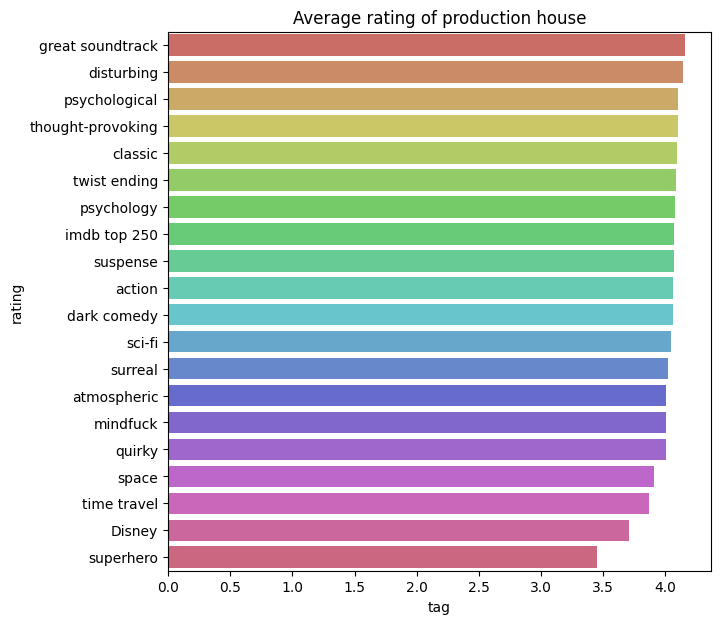

In [57]:
plt.figure(figsize=(7,7))
ax = sns.barplot(y=avrage.index, x=avrage.values, palette="hls")
plt.xlabel('tag')
plt.ylabel('rating')
plt.title('Average rating of production house')